# Task 4.4 a) M=24

This code uses Kaiser Window to creat a FIR high-pass filter. There will be two codes, one with M = 24 and another with M = 25.

When M = 25, a odd number, the filter becomes a type 2 FIR filter versus a type 1 filter when M = 24, a even number. The filter with M = 25 have one more ripple in the stopband and the amplitude stem plot have lower amplitudes with the highest amplitude as negative, versus the filter with M = 24 where the highest amplitudes appere as positive.  


Value of M    :  24
Value of delta:  0.020317157232704487


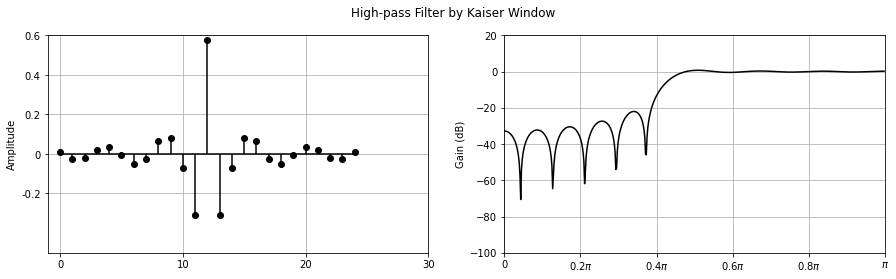

In [65]:
import numpy as np
from scipy import signal
from scipy import special as sps
import matplotlib.pyplot  as plt

np.seterr(divide='ignore', invalid='ignore');

M = 24
delta = 10**((M*2.285*dw + 8)/-20) # gives the correct delta based on the value of M
wp = .5*np.pi
ws = .35*np.pi
wc = (ws + wp)/2;

dw = abs(ws - wp);
A = -20*np.log10(delta);
n = np.arange(M+1)

# The ideal high-pass filter:
hi_hp = (np.sin(np.pi*(n-M/2)))/(np.pi*(n - M/2)) - (np.sin(wc*(n-M/2)))/(np.pi*(n - M/2))

hi_hp[np.isnan(hi_hp)] = 1 - wc/np.pi;
hi = hi_hp

# Building the Kaiser Window:

# Input parameters for the Kaiser window:
if A > 50:
    beta = .1102*(A - 8.7)
elif A < 21:
    beta = 0.
else:
    beta = .5842*(A - 21)**(.4) + .07886*(A - 21)

# Calling the modified Bessel functions of the first kind:
Win = np.abs(np.real(sps.iv(0, beta*(1 - ((n - M/2)/M/2)**2)**(1/2))/sps.iv(0,beta)))
h = hi*Win
w, H = signal.freqz(h,1,worN=512)

print('Value of M    : ',M)
print('Value of delta: ',delta)

fig1, axs = plt.subplots(1,2, sharex= False,figsize=(15,4))
fig1.suptitle('High-pass Filter by Kaiser Window')

markerline, stemlines, baseline  = axs[0].stem(h, markerfmt='ko')
markerline.set_markerfacecolor('k')
stemlines.set_color('k')
baseline.set_color('k')

axs[0].set_ylabel('Amplitude')
axs[0].set_ylim([-.5, .4])
axs[0].set_yticks([-0.2, 0, 0.2, 0.4, 0.6])
axs[0].set_yticklabels([-0.2, 0, 0.2, 0.4, 0.6])
axs[0].set_xlim([-1, len(h)])
axs[0].set_xticks([0, 10, 20, 30])
axs[0].grid(True)

axs[1].plot(w,20*np.log10(abs(H)),'k')
axs[1].set_ylabel('Gain (dB)')
axs[1].set_ylim([-100, 20])
axs[1].grid(True)
axs[1].set_xlim([0, np.pi])
axs[1].set_xticks([0, 2*np.pi/10, 4*np.pi/10, 6*np.pi/10, 8*np.pi/10, np.pi])
axs[1].set_xticklabels([0, r'$0.2\pi$', r'$0.4\pi$', r'$0.6\pi$',r'$0.8\pi$', r'$\pi$']);


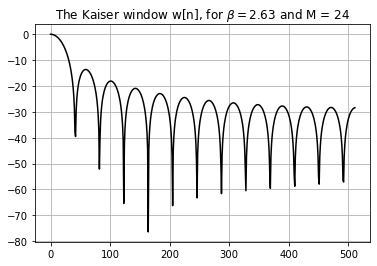

In [51]:

# FFT of the Kaiser window:
w, H = signal.freqz(Win,1,worN=512)
H = H/np.max(np.abs(H))
plt.plot(20*np.log10(abs(H)),'k')
# plt.plot(20*np.log10(abs(H/(np.max(np.abs(H))))),'k')
plt.grid()
plt.title('The Kaiser window w[n], for ' + r'$\beta = $' + str(round(beta,2)) + ' and ' + 'M = ' + str(int(M)));
